<img src='https://images.unsplash.com/photo-1563166423-482a8c14b2d6?auto=format&fit=crop&q=80&w=2070&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D' alt='construção-obra'>

# <center>PREVISÃO DO CUSTO UNITÁRIO BÁSICO (CUB) PARA A CONSTRUÇÃO CIVIL</center>
## Breve contexto

A norma brasileira ABNT NBR 12721:2006 afirma que o CUB é:

> _"O custo por metro quadrado de construção do projeto-padrão considerado, calculado de acordo com a metodologia estabelecida em 8.3, pelos Sindicatos da Indústria da Construção Civil, em atendimento ao disposto no artigo 54 da Lei nº 4.591/64 e que serve de base para avaliação de parte dos custos de construção das edificações."_

Portanto, o CUB é uma representação do custo fundamental de uma construção, incluindo despesas relacionadas a materiais de construção, mão de obra, gastos administrativos e o aluguel de equipamentos.

Os valores do CUB são divulgados mensalmente e calculados levando em consideração índices do SINAPI (Sistema Nacional de Pesquisa de Custos e Índices da Construção Civil) e são divulgados pelos sindicatos da construção civil de cada estado do país, sendo que os valores de sua série histórica também podem ser consultados através do IBGE (Instituto Brasileiro de Geografia e Estatística).

## Apresentação do projeto

O presente projeto tem como principal objetivo extrair informações sobre a série histórica dos valores do CUB, realizar o tratamento e análise desses dados e por fim realizar a previsão desse valor para os próximos meses. 

Através da previsão dos valores do CUB é possível estimar com maior precisão orçamentos de projetos de construção civil, bem como analisar com mais fidelidade a sua viabilidade. Esses fatores desempenham um papel crucial na gestão de recursos financeiros durante a execução de uma obra, o que impacta diretamente nos lucros de empresas do ramo da construção.

<a id='indice'></a>
## Índice

1. [Limpeza e preparação dos dados](#limpeza)
2. [Análise dos dados](#analise)
    - [Correlação interna](#correlacao_interna)
    - [Influência externa - Inflação](#influencia_externa)
3. [Previsão do CUB](#previsao)
    - [Regressão Linear](#regressao_linear)
4. [Conclusão](#conclusao)

<a id='limpeza'></a>
## 1. Limpeza e preparação dos dados

### Importando bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Importando a base de dados - Padrão Mínimo

Os dados abaixo são referentes ao custo de projeto em m², por tipo de projeto e padrão de acabamento, sendo que existem inúmeros tipos de projetos, que estarão dispostos em colunas, e quatro padrões de acabamento principais, que são: mínimo, baixo, normal e alto. Para o projeto atual será considerado o tipo de acabamento mínimo.

Caso deseje realizar mais consultas, os dados podem ser encontrados na [Tabela 647 do sistema SIDRA do IBGE](https://sidra.ibge.gov.br/Tabela/647).

Na exportação do arquivo .csv serão ignoradas as informações contidas nas primeiras e últimos linhas, por se tratarem de informações que não compõe a base de dados.

In [2]:
df = pd.read_csv(
    './assets/data/cub_minimo.csv', 
    sep=';', 
    skiprows=5, 
    skipfooter=14, 
    engine='python'
)

df

,Mês,"CP.1-2Q.....46 Casa popular, 1 pavimento, varanda, sala, 2 quartos, circulação, banheiro e cozinha","CP.1-2Q.....40 Casa popular, 1 pavimento, sala, 2 quartos, circulação, banheiro e cozinha","CR.1-2Q.....62 Casa residencial, 1 pavimento, varanda, sala,2 quartos, circulação, banheiro, cozinha, área de serviço, quarto e WC de empregada","CR.1-3Q....104 Casa residencial, 1 pavimento, varanda, sala,3 quartos, circulação, banheiro, lavabo, cozinha, área de serviço, quarto e WC de empregada","CR.1-4Q....122 Casa residencial, 1 pavimento, varanda, sala,4 quartos, circulação, 2 banheiros, cozinha, área de serviço, quarto e WC de empregada","EA.1-US.....04 Especificação tipo ""A"", 1 pavimento, somente unidade sanitária","EB.1-US.....03 Especificação tipo ""B"", 1 pavimento, somente unidade sanitária","EA.1-0Q.....22 Especificação tipo ""A"", 1 pavimento, sala, cozinha e banheiro","EB.1-0Q.....22 Especificação tipo ""B"", 1 pavimento, sala, cozinha e banheiro",...,"PR18-4QP..5870 Prédio residencial, pilotis, 18 pavimentos tipo, sala, 4 quartos, circulação, 2 banheiros, lavabo, copa-cozinha, área de serviço, quarto e WC de empregada","PC.12-LA..8192 Prédio comercial, 12 pavimentos, lojas e salas autônomas","PC.18-LA.11072 Prédio comercial, 18 pavimentos, lojas e salas autônomas","PC.12-LC..6862 Prédio comercial, 12 pavimentos, lojas e andar corrido","PC.18-LC.10111 Prédio comercial, 18 pavimentos, lojas e andar corrido","CB-M........31 Projeto-tipo cesta básica, materiais, sala, quarto, circulação, banheiro e cozinha","CB-MMIN.....23 Projeto-tipo cesta básica, materiais mínimos, sala, circulação, banheiro e cozinha","CB-M........23 Projeto-tipo cesta básica, materiais, sala, circulação, banheiro e cozinha","CB-MMO......31 Projeto-tipo cesta básica, materiais e mão-de-obra, sala, quarto, circulação, banheiro e cozinha","CB-MMO......23 Projeto-tipo cesta básica, materiais e mão-de-obra, sala, circulação, banheiro e cozinha"
0,janeiro 1999,"161,51","181,43","188,46",-,-,"367,94","459,52","231,53","229,83",...,-,-,-,-,-,"69,10","61,74","76,97","154,48","176,97"
1,fevereiro 1999,"164,87","185,26","192,37",-,-,"377,55","472,00","236,03","234,37",...,-,-,-,-,-,"70,25","63,01","78,26","157,33","180,22"
2,março 1999,"169,57","190,53","197,65",-,-,"383,16","478,81","241,59","240,41",...,-,-,-,-,-,"70,63","63,23","78,61","162,69","186,37"
3,abril 1999,"169,85","190,87","198,14",-,-,"387,65","484,59","242,94","241,45",...,-,-,-,-,-,"71,07","63,73","79,20","163,12","186,96"
4,maio 1999,"170,42","191,52","198,97",-,-,"389,41","486,66","244,82","242,91",...,-,-,-,-,-,"71,36","64,02","79,42","163,43","187,19"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,abril 2023,"1128,40","1267,36","1304,91",-,-,"2368,39","2942,39","1707,77","1693,87",...,-,-,-,-,-,"488,06","426,14","540,19","1022,40","1165,50"
292,maio 2023,"1124,30","1262,53","1299,35",-,-,"2358,00","2929,00","1699,15","1685,35",...,-,-,-,-,-,"484,64","423,26","536,11","1018,98","1161,42"
293,junho 2023,"1121,13","1258,71","1295,05",-,-,"2333,37","2897,74","1692,18","1680,45",...,-,-,-,-,-,"480,84","419,89","531,12","1015,18","1156,44"
294,julho 2023,"1119,33","1256,71","1293,66",-,-,"2322,21","2885,78","1687,05","1676,38",...,-,-,-,-,-,"479,49","418,42","529,59","1013,83","1154,91"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 40 columns):
 #   Column                                                                                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                                                                                       --------------  ----- 
 0   Mês                                                                                                                                                                          296 non-null    object
 1   CP.1-2Q.....46 Casa popular, 1 pavimento, varanda, sala, 2 quartos, circulação, banheiro e cozinha                                                                           296 non-null    object
 2   CP.1-2Q.....40 Casa popular, 1 pavimento, sala, 2 quartos, circulação, banheiro e cozi

### Otimização dos rótulos de colunas

Observa-se que os rótulos das colunas são extensos e contém informações que, a princípio, não são relevantes. De acordo com a cartilha [Relação de projetos: nomenclaturas e tipologias](./assets/docs/relacao_de_projetos_nomenclaturas_e_tipologias_tabela_647.pdf) do IBGE, nota-se que a informação logo após o código se refere a área (em m²) do empreendimento, portanto, considerando isso serão filtrados esses rótulos para uma apresentação mais clara dessa área dentro do código a que se refere.

Para tal, será realizada uma cópia do dataframe original.

In [4]:
dfc = df.copy()
codigo_area = dfc.columns.str.replace(r' .*', 'm2', regex=True)
codigo_area

Index(['Mês', 'CP.1-2Q.....46m2', 'CP.1-2Q.....40m2', 'CR.1-2Q.....62m2',
       'CR.1-3Q....104m2', 'CR.1-4Q....122m2', 'EA.1-US.....04m2',
       'EB.1-US.....03m2', 'EA.1-0Q.....22m2', 'EB.1-0Q.....22m2',
       'EA.1-1Q.....30m2', 'EB.1-1Q.....32m2', 'EA.2-2Q.....38m2',
       'EB.1-2Q.....39m2', 'EB.2-2Q.....45m2', 'CP.1-1Q.....30m2',
       'CP.2-3Q.....56m2', 'CR.2-2Q.....81m2', 'PR5-2QT...2125m2',
       'PR4-2QT...1433m2', 'PR4-3QT...2264m2', 'PR4-2QP...1643m2',
       'PR4-3QP...2520m2', 'PR6-3QP...7181m2', 'PR8-2QP...2620m2',
       'PR8-3QP...4266m2', 'PR8-3QP...3176m2', 'PR12-2QP..3597m2',
       'PR12-3QP..6013m2', 'PR12-4QP..4050m2', 'PR18-4QP..5870m2',
       'PC.12-LA..8192m2', 'PC.18-LA.11072m2', 'PC.12-LC..6862m2',
       'PC.18-LC.10111m2', 'CB-M........31m2', 'CB-MMIN.....23m2',
       'CB-M........23m2', 'CB-MMO......31m2', 'CB-MMO......23m2'],
      dtype='object')

Agora, de maneira mais clara, é possível observar a presença de diversos tipos de empreendimentos, de 3 m² a 11072 m². Por ora, serão armazenos esses rótulos, e para prosseguir com uma análise ainda mais otimizada e aprofundada serão renomeados esses rótulos para "Modelo 1" até "Modelo 39".

In [5]:
dfc.columns = ['Data'] + [f'Modelo {column}' for column in range(1, 40)]  
dfc.head()

,Data,Modelo 1,Modelo 2,Modelo 3,Modelo 4,Modelo 5,Modelo 6,Modelo 7,Modelo 8,Modelo 9,...,Modelo 30,Modelo 31,Modelo 32,Modelo 33,Modelo 34,Modelo 35,Modelo 36,Modelo 37,Modelo 38,Modelo 39
0,janeiro 1999,"161,51","181,43","188,46",-,-,"367,94","459,52","231,53","229,83",...,-,-,-,-,-,"69,10","61,74","76,97","154,48","176,97"
1,fevereiro 1999,"164,87","185,26","192,37",-,-,"377,55","472,00","236,03","234,37",...,-,-,-,-,-,"70,25","63,01","78,26","157,33","180,22"
2,março 1999,"169,57","190,53","197,65",-,-,"383,16","478,81","241,59","240,41",...,-,-,-,-,-,"70,63","63,23","78,61","162,69","186,37"
3,abril 1999,"169,85","190,87","198,14",-,-,"387,65","484,59","242,94","241,45",...,-,-,-,-,-,"71,07","63,73","79,20","163,12","186,96"
4,maio 1999,"170,42","191,52","198,97",-,-,"389,41","486,66","244,82","242,91",...,-,-,-,-,-,"71,36","64,02","79,42","163,43","187,19"


### Verificação de valores nulos e/ou faltantes

In [6]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 40 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Data       296 non-null    object
 1   Modelo 1   296 non-null    object
 2   Modelo 2   296 non-null    object
 3   Modelo 3   296 non-null    object
 4   Modelo 4   296 non-null    object
 5   Modelo 5   296 non-null    object
 6   Modelo 6   296 non-null    object
 7   Modelo 7   296 non-null    object
 8   Modelo 8   296 non-null    object
 9   Modelo 9   296 non-null    object
 10  Modelo 10  296 non-null    object
 11  Modelo 11  296 non-null    object
 12  Modelo 12  296 non-null    object
 13  Modelo 13  296 non-null    object
 14  Modelo 14  296 non-null    object
 15  Modelo 15  296 non-null    object
 16  Modelo 16  296 non-null    object
 17  Modelo 17  296 non-null    object
 18  Modelo 18  296 non-null    object
 19  Modelo 19  296 non-null    object
 20  Modelo 20  296 non-null    objec

In [7]:
for i in range (1, 40):
    coluna = f'Modelo {i}'
    dfc[coluna] = dfc[coluna].astype(str).str.replace(',', '.', regex=True)
    dfc[coluna] = pd.to_numeric(dfc[coluna], errors='coerce')

dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 40 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Data       296 non-null    object 
 1   Modelo 1   296 non-null    float64
 2   Modelo 2   296 non-null    float64
 3   Modelo 3   296 non-null    float64
 4   Modelo 4   0 non-null      float64
 5   Modelo 5   0 non-null      float64
 6   Modelo 6   296 non-null    float64
 7   Modelo 7   296 non-null    float64
 8   Modelo 8   296 non-null    float64
 9   Modelo 9   296 non-null    float64
 10  Modelo 10  296 non-null    float64
 11  Modelo 11  296 non-null    float64
 12  Modelo 12  296 non-null    float64
 13  Modelo 13  296 non-null    float64
 14  Modelo 14  296 non-null    float64
 15  Modelo 15  296 non-null    float64
 16  Modelo 16  296 non-null    float64
 17  Modelo 17  296 non-null    float64
 18  Modelo 18  296 non-null    float64
 19  Modelo 19  0 non-null      float64
 20  Modelo 20 

In [8]:
dfc.head()

,Data,Modelo 1,Modelo 2,Modelo 3,Modelo 4,Modelo 5,Modelo 6,Modelo 7,Modelo 8,Modelo 9,...,Modelo 30,Modelo 31,Modelo 32,Modelo 33,Modelo 34,Modelo 35,Modelo 36,Modelo 37,Modelo 38,Modelo 39
0,janeiro 1999,161.51,181.43,188.46,NaN,NaN,367.94,459.52,231.53,229.83,...,NaN,NaN,NaN,NaN,NaN,69.10,61.74,76.97,154.48,176.97
1,fevereiro 1999,164.87,185.26,192.37,NaN,NaN,377.55,472.00,236.03,234.37,...,NaN,NaN,NaN,NaN,NaN,70.25,63.01,78.26,157.33,180.22
2,março 1999,169.57,190.53,197.65,NaN,NaN,383.16,478.81,241.59,240.41,...,NaN,NaN,NaN,NaN,NaN,70.63,63.23,78.61,162.69,186.37
3,abril 1999,169.85,190.87,198.14,NaN,NaN,387.65,484.59,242.94,241.45,...,NaN,NaN,NaN,NaN,NaN,71.07,63.73,79.20,163.12,186.96
4,maio 1999,170.42,191.52,198.97,NaN,NaN,389.41,486.66,244.82,242.91,...,NaN,NaN,NaN,NaN,NaN,71.36,64.02,79.42,163.43,187.19


É possível observar que alguns modelos não possuem valor algum dentro da série histórica, o que reflete que tais modelos não se encaixam no padrão de projeto mínimo que foi mencionado no início do presente projeto. Tais informações sobre esses modelos estão presentes em outros padrões de projeto, como 'baixo', 'normal' ou 'alto'.

Por ter certeza que esses modelos faltantes não apresentam valores, iremos removê-los.

In [9]:
dfc = dfc.dropna(axis=1, how='all')
dfc.head()

,Data,Modelo 1,Modelo 2,Modelo 3,Modelo 6,Modelo 7,Modelo 8,Modelo 9,Modelo 10,Modelo 11,...,Modelo 14,Modelo 15,Modelo 16,Modelo 17,Modelo 18,Modelo 35,Modelo 36,Modelo 37,Modelo 38,Modelo 39
0,janeiro 1999,161.51,181.43,188.46,367.94,459.52,231.53,229.83,204.63,208.20,...,188.27,198.59,185.45,159.48,139.88,69.10,61.74,76.97,154.48,176.97
1,fevereiro 1999,164.87,185.26,192.37,377.55,472.00,236.03,234.37,208.51,212.10,...,191.73,202.87,189.14,162.73,143.02,70.25,63.01,78.26,157.33,180.22
2,março 1999,169.57,190.53,197.65,383.16,478.81,241.59,240.41,213.61,217.78,...,197.04,208.41,194.93,167.44,145.47,70.63,63.23,78.61,162.69,186.37
3,abril 1999,169.85,190.87,198.14,387.65,484.59,242.94,241.45,214.59,218.57,...,197.81,208.90,195.57,168.23,145.59,71.07,63.73,79.20,163.12,186.96
4,maio 1999,170.42,191.52,198.97,389.41,486.66,244.82,242.91,216.05,219.87,...,199.15,209.64,196.61,169.44,148.29,71.36,64.02,79.42,163.43,187.19


### Formatação das datas

Por fim, para garantir que as datas sejam processadas corretamente, e também para melhor visualização nos rótulos dos gráficos que serão plotados futuramente, será realizada sua formatação para o modelo "ano-mês".

In [10]:
meses = {
    'janeiro': '01', 
    'fevereiro': '02', 
    'março': '03', 
    'abril': '04',
    'maio': '05', 
    'junho': '06', 
    'julho': '07', 
    'agosto': '08', 
    'setembro': '09', 
    'outubro': '10', 
    'novembro': '11', 
    'dezembro': '12'
}

dfc['Data'] = dfc['Data'].replace(meses, regex=True)
dfc['Data'] = pd.to_datetime(dfc['Data']).dt.strftime('%Y-%m')
dfc['Data']

0      1999-01
1      1999-02
2      1999-03
3      1999-04
4      1999-05
        ...   
291    2023-04
292    2023-05
293    2023-06
294    2023-07
295    2023-08
Name: Data, Length: 296, dtype: object

[Voltar ao índice](#indice)
<a id="analise"></a>
## 2. Análise dos dados

<a id='correlacao_interna'></a>
### 2.1 Correlação interna

Como apresentado, cada modelo reflete um tipo de construção, podendo ela ser residencial, comercial, industrial, dentre outros. Porém todas essas construções possuem insumos em comum (materiais, mão de obra, equipamentos, etc), e por isso é esperado que a variação de seus custos tenha uma forte correlação, mas pra corroborar essa ideia será mensurado o coeficiente de Pearson.

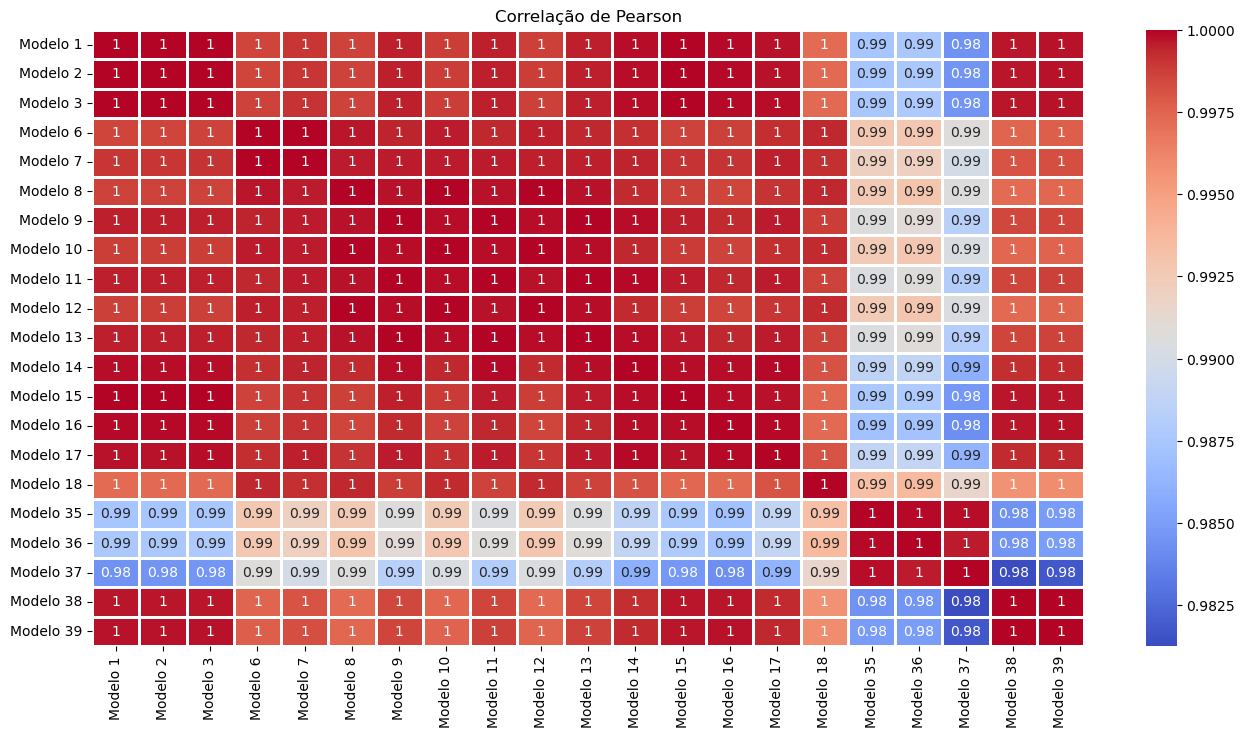

In [11]:
pearson = dfc.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(16 ,8))
sns.heatmap(pearson, annot= True, cmap='coolwarm', linewidths=2)
plt.title('Correlação de Pearson')
plt.show()

Com isso, pode-se concluir que a correlação entre todos os modelos são fortíssimas, sendo a menor delas apresentando valor de aproximadamente 0,9825.

### Série histórica do CUB: Padrão mínimo geral

Isso posto, será plotado abaixo o gráfico da série histórica de todos os modelos do padrão mínimo, afim de observar seus comportamentos, demonstrando a forte correlação calculada pelo coeficiente de Pearson.

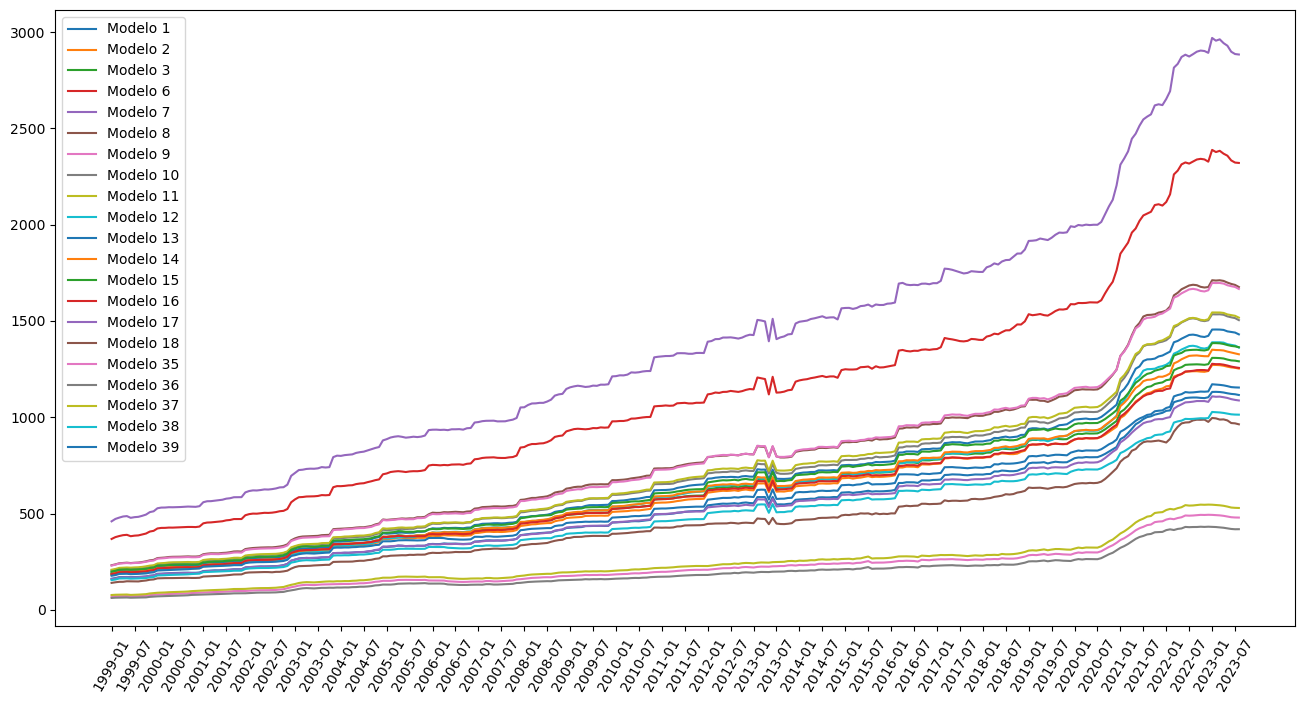

In [12]:
plt.figure(figsize=(16, 8))

legenda=[]

for coluna in dfc.columns:
    if coluna.startswith("Modelo"):
        plt.plot(dfc['Data'], dfc[coluna])
        legenda.append(coluna)
        n = 6
        plt.xticks(range(0, len(dfc['Data']), n), rotation=60)

if legenda:
    plt.legend(legenda)
    
plt.show()

De fato todos os modelos seguem um mesmo perfil, com comportamento muito parecido, portanto será prosseguida a análise apenas para um dos modelos, que será tomado de exemplo. No caso será abordado "Modelo 1".

### Série histórica do CUB: Padrão mínimo - Modelo 1

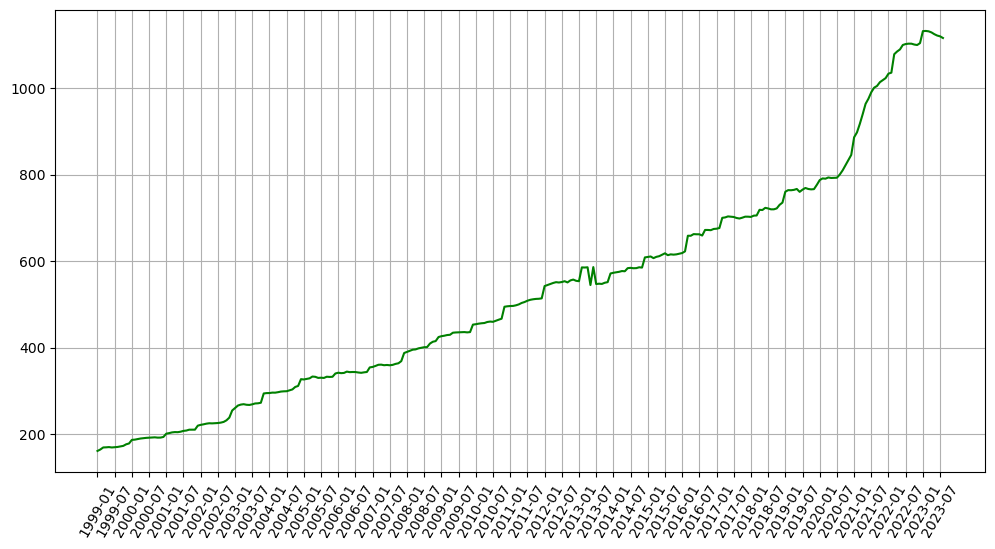

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(dfc['Data'], dfc['Modelo 1'], linestyle='-', color='green')
plt.grid(True)

n = 6
plt.xticks(range(0, len(dfc['Data']), n), rotation=60)

plt.show()

É possível analisar que o valor do CUB teve um crescimento constante, com alguns pontos importantes a serem destacados:

* A flutuação nos valores do CUB entre o segundo semestre de 2012 e o primeiro semestre de 2013;

   Sobre esse ponto, de acordo com o IBGE, pode-se afirmar que: " Os resultados de maio de 2013 refletem a desoneração da folha de pagamento de empresas do setor da construção civil, em vigor desde primeiro de abril deste ano. À desoneração foi regulamentada através da medida provisória nº 601, de 28 de dezembro de 2012, tratando do cálculo dos encargos sociais, que retirou os 20% relativos à contribuição previdenciária incidente na folha de pagamento.
   Os resultados do mês junho de 2013 refletem o retorno da contribuição previdenciária sobre a folha de pagamento de empresas do setor da construção civil, que havia vigorado nos meses de abril e maio. A desoneração, vigente a partir de primeiro de abril, teve seus efeitos interrompidos em 03 de junho em função da perda de validade da medida provisória que a criou, a MP 601/12, de 28 de dezembro de 2012. Entre outros aspectos, a medida tratou de retirar os 20% da contribuição previdenciária incidente sobre o setor, o que se refletiu integralmente no mês de maio.
   Os resultados a partir de julho de 2013 refletem a lei 12.844, sancionada em 19 de julho de 2013, que estabelece, entre outras disposições, a desoneração da folha de pagamento retirando do cálculo dos encargos sociais, os 20% relativos à contribuição previdenciária incidente na folha de pagamento. Continuam sendo parte da divulgação, no site do IBGE, os índices e custos que não levam em consideração desoneração da folha de pagamento.
   
* O crescimento desenfreado do valor do CUB a partir do primeiro semestre de 2020.
    
   De acordo com Eduardo Zaidan, vice-presidente de Economia do SindusCon-SP, o mercado se aqueceu de forma exacerbada por causa da pandemia do COVID-19, e isso somado a dificuldade logística dos materiais e falta de mão de obra fez o índice subir muito, porém é possível observar que agora ele está recuando e em processo de deflação, visto que a demanda não está tão grande como estava no pós-pandemia.


Posterior a essa análise, será realizada uma correlação externa do CUB, e para isso serão coletados dados relacionados a inflação, de forma a analisar seu impacto nos custos referentes a construção civil.

[Voltar ao índice](#indice)
<a id='influencia_externa'></a>
## 2.2 Influência externa - Inflação

### Limpeza e preparação dos dados - IPCA

   De acordo com o Banco Central do Brasil, o Índice Nacional de Preços ao Consumidor Amplo (IPCA) é o índice utilizado no sistema de metas para a inflação. Então, levando isso em consideração, será analisada a série histórica do valor do IPCA, abordando exatamente o mesmo período em que foram avaliados os valores do CUB.

   Os dados apresentados abaixo podem ser consultandos através da [Tabela 1737 do sistema SIDRA do IBGE](https://sidra.ibge.gov.br/tabela/1737).
   
   Assim como foram feitos com os dados do CUB, os dados referentes ao IPCA serão exportados, tratados e analisados.

In [14]:
df_ipca = pd.read_csv(
    './assets/data/ipca.csv', 
    sep=';',
    names=['Data', 'IPCA'],
    skiprows=4, 
    skipfooter=13, 
    engine='python'
)

df_ipca

,Data,IPCA
0,janeiro 1999,"1468,4100000000000"
1,fevereiro 1999,"1483,8300000000000"
2,março 1999,"1500,1500000000000"
3,abril 1999,"1508,5500000000000"
4,maio 1999,"1513,0800000000000"
...,...,...
291,abril 2023,"6649,9900000000000"
292,maio 2023,"6665,2800000000000"
293,junho 2023,"6659,9500000000000"
294,julho 2023,"6667,9400000000000"


In [15]:
df_ipca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    296 non-null    object
 1   IPCA    296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [16]:
df_ipca['IPCA'] = df_ipca['IPCA'].astype(str).str.replace(',', '.', regex=True)
df_ipca['IPCA'] = pd.to_numeric(df_ipca['IPCA'], errors='coerce')
df_ipca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    296 non-null    object 
 1   IPCA    296 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.8+ KB


In [17]:
df_ipca['Data'] = df_ipca['Data'].replace(meses, regex=True)
df_ipca['Data'] = pd.to_datetime(df_ipca['Data']).dt.strftime('%Y-%m')
df_ipca['Data']

0      1999-01
1      1999-02
2      1999-03
3      1999-04
4      1999-05
        ...   
291    2023-04
292    2023-05
293    2023-06
294    2023-07
295    2023-08
Name: Data, Length: 296, dtype: object

### Análise dos dados - IPCA

Por fim, será plotado o gráfico da série histórica do IPCA, afim de analisá-lo.

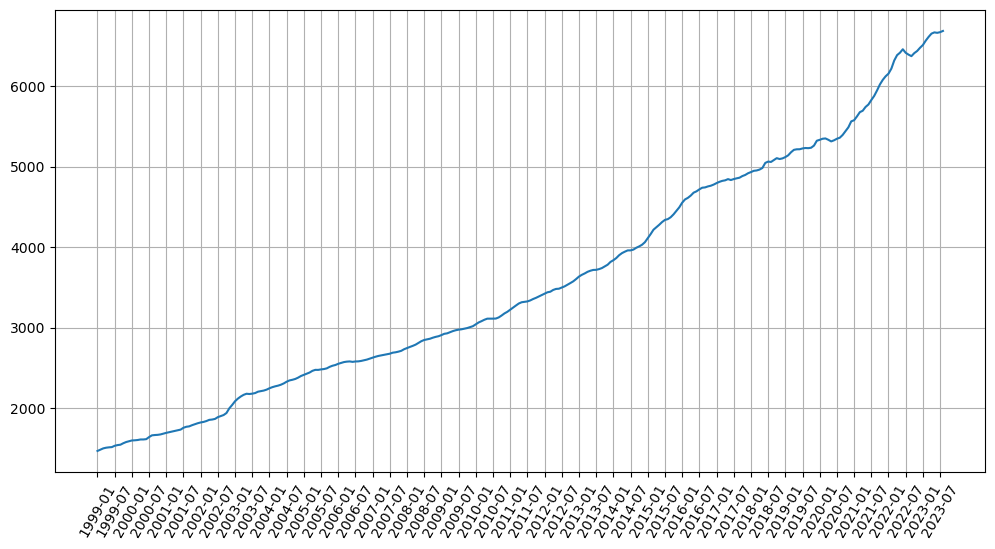

In [18]:
plt.figure(figsize=(12,6))

plt.plot(df_ipca['Data'], df_ipca['IPCA'])
plt.grid(True)

n = 6
plt.xticks(range(0, len(df_ipca['Data']), n), rotation=60)

plt.show()

Pode-se afirmar que o IPCA tem um comportamento similar ao do CUB, com pontos de atenção também a partir do primeiro semestre de 2020, que pode indicar o impacto da pandemia. Para analisar essa correlação serão unificados os DataFrames do CUB e do IPCA.

### Gráfico de dispersão e correlação do CUB com a inflação

In [19]:
dfc = pd.merge(dfc, df_ipca, on='Data')
dfc.head()

,Data,Modelo 1,Modelo 2,Modelo 3,Modelo 6,Modelo 7,Modelo 8,Modelo 9,Modelo 10,Modelo 11,...,Modelo 15,Modelo 16,Modelo 17,Modelo 18,Modelo 35,Modelo 36,Modelo 37,Modelo 38,Modelo 39,IPCA
0,1999-01,161.51,181.43,188.46,367.94,459.52,231.53,229.83,204.63,208.20,...,198.59,185.45,159.48,139.88,69.10,61.74,76.97,154.48,176.97,1468.41
1,1999-02,164.87,185.26,192.37,377.55,472.00,236.03,234.37,208.51,212.10,...,202.87,189.14,162.73,143.02,70.25,63.01,78.26,157.33,180.22,1483.83
2,1999-03,169.57,190.53,197.65,383.16,478.81,241.59,240.41,213.61,217.78,...,208.41,194.93,167.44,145.47,70.63,63.23,78.61,162.69,186.37,1500.15
3,1999-04,169.85,190.87,198.14,387.65,484.59,242.94,241.45,214.59,218.57,...,208.90,195.57,168.23,145.59,71.07,63.73,79.20,163.12,186.96,1508.55
4,1999-05,170.42,191.52,198.97,389.41,486.66,244.82,242.91,216.05,219.87,...,209.64,196.61,169.44,148.29,71.36,64.02,79.42,163.43,187.19,1513.08


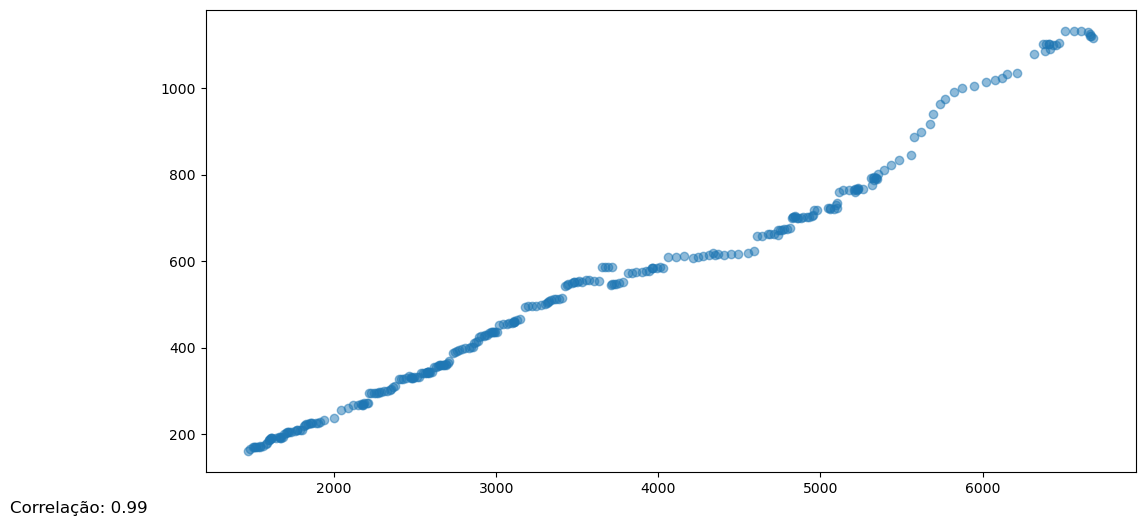

In [20]:
plt.figure(figsize=(12, 6))

plt.scatter(dfc['IPCA'], dfc['Modelo 1'], alpha=0.5)

correlacao = dfc['IPCA'].corr(dfc['Modelo 1'])

plt.text(1, 18, f'Correlação: {correlacao:.2f}', fontsize=12)

plt.show()

Através da análise do gráfico pode-se afirmar que a correlação entre os valores do CUB e a inflação é linear positiva e fortíssima por se tratar de um coeficiente igual a 0.99. Claro que atrelado a esses dois índices estão diversos outros fatores, que por ora não serão abordados nesse projeto, mas poderão ser considerados em futuros aprimoramentos desse documento.

[Voltar ao índice](#indice)
<a id='previsao'></a>
## 3. Previsão do CUB

Perante análise realizada, a proposta é efetuar a previsão dos valores do CUB para os próximos meses, e para isso podem ser consideradas diversas teorias e metodologias. Nessa primeira versão do projeto, será considerado o método estatístico da Regressão Linear.


<a id='regressao_linear'></a>
## 3.1 Regressão Linear

Na execução do modelo em questão, serão utilizadas quatro variáveis, sendo "Mês", "Ano" e "IPCA" as variáveis independentes, e o "CUB" do Modelo 1 a variável dependente, que será prevista.
Para isso, será necessário separar a coluna "Data" em "Mês" e "Ano".

### Declarando as variáveis independentes e dependente

In [21]:
dfc['Data'] = pd.to_datetime(dfc['Data'], format='%Y-%m')
dfc['Ano'] = dfc['Data'].dt.year
dfc['Mês'] = dfc['Data'].dt.month

In [22]:
dfc.head()

,Data,Modelo 1,Modelo 2,Modelo 3,Modelo 6,Modelo 7,Modelo 8,Modelo 9,Modelo 10,Modelo 11,...,Modelo 17,Modelo 18,Modelo 35,Modelo 36,Modelo 37,Modelo 38,Modelo 39,IPCA,Ano,Mês
0,1999-01-01,161.51,181.43,188.46,367.94,459.52,231.53,229.83,204.63,208.20,...,159.48,139.88,69.10,61.74,76.97,154.48,176.97,1468.41,1999,1
1,1999-02-01,164.87,185.26,192.37,377.55,472.00,236.03,234.37,208.51,212.10,...,162.73,143.02,70.25,63.01,78.26,157.33,180.22,1483.83,1999,2
2,1999-03-01,169.57,190.53,197.65,383.16,478.81,241.59,240.41,213.61,217.78,...,167.44,145.47,70.63,63.23,78.61,162.69,186.37,1500.15,1999,3
3,1999-04-01,169.85,190.87,198.14,387.65,484.59,242.94,241.45,214.59,218.57,...,168.23,145.59,71.07,63.73,79.20,163.12,186.96,1508.55,1999,4
4,1999-05-01,170.42,191.52,198.97,389.41,486.66,244.82,242.91,216.05,219.87,...,169.44,148.29,71.36,64.02,79.42,163.43,187.19,1513.08,1999,5


In [23]:
x = dfc[['IPCA', 'Ano', 'Mês']]
y = dfc[['Modelo 1']]

In [24]:
x

,IPCA,Ano,Mês
0,1468.41,1999,1
1,1483.83,1999,2
2,1500.15,1999,3
3,1508.55,1999,4
4,1513.08,1999,5
...,...,...,...
291,6649.99,2023,4
292,6665.28,2023,5
293,6659.95,2023,6
294,6667.94,2023,7


In [25]:
y

,Modelo 1
0,161.51
1,164.87
2,169.57
3,169.85
4,170.42
...,...
291,1128.40
292,1124.30
293,1121.13
294,1119.33


### Separando os dados em Treino e Teste

Será considerada uma amostra de 30% dos dados para teste e 70% para treino.

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(197, 3)
(99, 3)
(197, 1)
(99, 1)


### Aplicando a Regressão Linear

In [28]:
lr = LinearRegression()
# x_train = x_train.values
# y_train = y_train.values

lr.fit(x_train.values, y_train)

LinearRegression()

In [29]:
print(lr.coef_)
print(lr.intercept_)

[[ 0.20752212 -6.55849578 -0.54434769]]
[12974.18253353]


In [30]:
print(x_test)
print(y_test)
print(x_train)
print(y_train)

        IPCA   Ano  Mês
230  4950.95  2018    3
228  4930.72  2018    1
12   1598.41  2000    1
215  4775.70  2016   12
264  5574.49  2021    1
..       ...   ...  ...
161  3482.72  2012    6
246  5224.18  2019    7
145  3248.20  2011    2
201  4405.95  2015   10
71   2398.92  2004   12

[99 rows x 3 columns]
     Modelo 1
230    705.51
228    702.15
12     187.09
215    674.33
264    886.08
..        ...
161    550.63
246    765.15
145    496.51
201    615.00
71     327.33

[99 rows x 1 columns]
        IPCA   Ano  Mês
136  3110.74  2010    5
239  5100.61  2018   12
200  4370.12  2015    9
284  6370.34  2022    9
209  4691.59  2016    6
..       ...   ...  ...
251  5320.25  2019   12
192  4110.20  2015    1
117  2874.43  2008   10
47   2039.78  2002   12
172  3706.28  2013    5

[197 rows x 3 columns]
     Modelo 1
136    459.39
239    735.20
200    615.66
284   1102.38
209    662.07
..        ...
251    776.31
192    609.64
117    413.72
47     254.96
172    544.80

[197 rows x 1 col

### Realizando a previsão

Após prever os dados será criado um novo DataFrame denominado "dfpred", e nele serão dispostos os valores do "CUB real" e o "CUB previsto".

In [31]:
y_train_pred = lr.predict(x_train.values)
y_test_pred = lr.predict(x_test.values)

In [32]:
dfpred = pd.DataFrame()
dfpred['CUB real'] = y_test['Modelo 1']
dfpred['CUB previsto'] = y_test_pred
dfpred

,CUB real,CUB previsto
230,705.51,764.936658
228,702.15,761.827180
12,187.09,188.352068
215,674.33,736.786268
264,886.08,875.748208
...,...,...
161,550.63,497.964386
246,765.15,812.902040
145,496.51,458.032185
201,615.00,667.702155


In [33]:
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print('MAE: ', mae)
print('R²: ', r2)

MAE:  30.857060226243835
R²:  0.978395240305527


O MAE (mean absolute error ou erro absoluto médio) observado indica que a previsão do CUB está variando aproximadamente 30,86 para mais ou para menos dos valores reais, o que é de certa forma satisfatório.
Enquanto isso o R² (coeficiente de determinação) indica que o modelo é capaz de explicar cerca de 97,8% da variabilidade nos dados de resposta, o que é muito bom.

O gráfico abaixo ilustra os dados de treino e teste do CUB real e do CUB previsto, e é possível observar que os dados se encontram bem próximos, corroborando com o estudo realizado até o momento. 

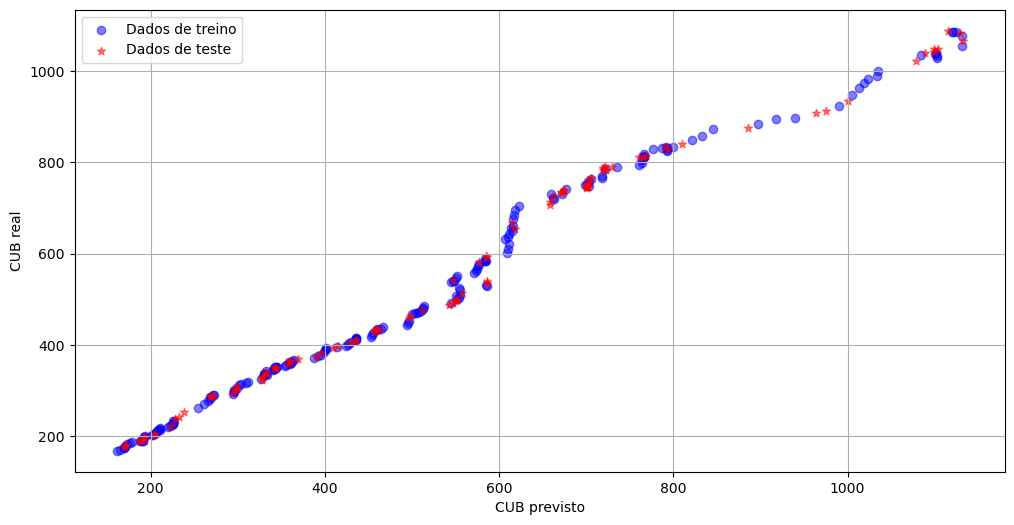

In [34]:
plt.figure(figsize=(12, 6))

plt.scatter(y_train, y_train_pred, c = 'blue', marker = 'o', label = 'Dados de treino', alpha = 0.5)
plt.scatter(y_test, y_test_pred, c = 'red', marker = '*', label = 'Dados de teste', alpha = 0.5)
plt.xlabel('CUB previsto')
plt.ylabel('CUB real')
plt.legend()
plt.grid()


plt.show()

### Exemplo de predição para dezembro de 2023

Para testar o resultado do modelo será realizada a previsão do CUB para dezembro de 2023. Para tal, é necessário determinar o valor do IPCA para esse período.

De forma a determinar o valor do IPCA para os meses seguintes, será considerado o [Boletim Focus](https://www.bcb.gov.br/publicacoes/focus) do Banco Central do Brasil, que apresenta as estatísticas calculadas considerando expectativas de mercado atualizadas semanalmente.

Isso posto, o IPCA utilizado será de R$6.756,38.

In [35]:
pred_ipca = 6756.58
pred_ano = 2023
pred_mes = 12

pred_cub = lr.predict([[pred_ipca, pred_ano, pred_mes]])[0][0]

print(f"O valor previsto do CUB para dezembro de 2023 é: R${pred_cub:.2f}")

O valor previsto do CUB para dezembro de 2023 é: R$1101.95


<a name='conclusao'></a>
[Voltar ao índice](#indice)
## Conclusão

Por fim, o resultado obtido no presente projeto foi satisfatório, mas apesar disso essa é apenas a primeira versão do projeto. Estou continuando os estudos a fim de aplicar novas técnicas, métodos e modelos de predição para obter resultados ainda mais fiéis.

Além disso, para as próximas versões pretendo realizar melhorias e trazer uma interface mais amigável ao usuário, como por exemplo a adição de inputs de mês e ano em caixas para realizar a previsão do CUB sem precisar executar os blocos de código manualmente, além de trazer a análise dos outros padrões de construção citados no início do capítulo 1. Também, para melhorar a manutenção e disposição do projeto,  pretendo trazer uma organização mais modular do código, criando funções bem definidas com o objetivo de realizar determinadas tarefas.

Estou totalmente aberto a feedbacks, e caso tenha alguma ideia, crítica ou opinião sobre o projeto pode ficar a vontade pra me contatar. Agradeço a quem leu até aqui, e espero que tenham gostado do meu trabalho.

<br>

### Contato

Linkedin: [Gabriel Dornellas Falconi](https://www.linkedin.com/in/bgfalconi/)

Github: [bfalconi](https://github.com/bfalconi)